## **CCI (Commodity Channel Index):**

   - *__Purpose__*: CCI measures deviations from an asset's average price and helps identify potential overbought or oversold conditions.
   - *__Activation and Usage__*: Use the `talib.CCI` function in Python. CCI values above 100 or below -100 might indicate potential reversal points.
   - *__Strategy__*: CCI values moving above/below certain thresholds can signal potential trend changes or reversals.
   - *__Key Points__*: Look for divergences between CCI and price trends for potential trade opportunities.
   - *__Effective Conditions__*: CCI is useful for identifying overextended price moves.

In [1]:
import talib
from backtesting.test import GOOG
from backtesting import Backtest , Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import pandas as pd
print(talib.CCI.__doc__)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


 CCI(high, low, close[, timeperiod=?])

    Commodity Channel Index (Momentum Indicators)

    Inputs:
        prices: ['high', 'low', 'close']
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


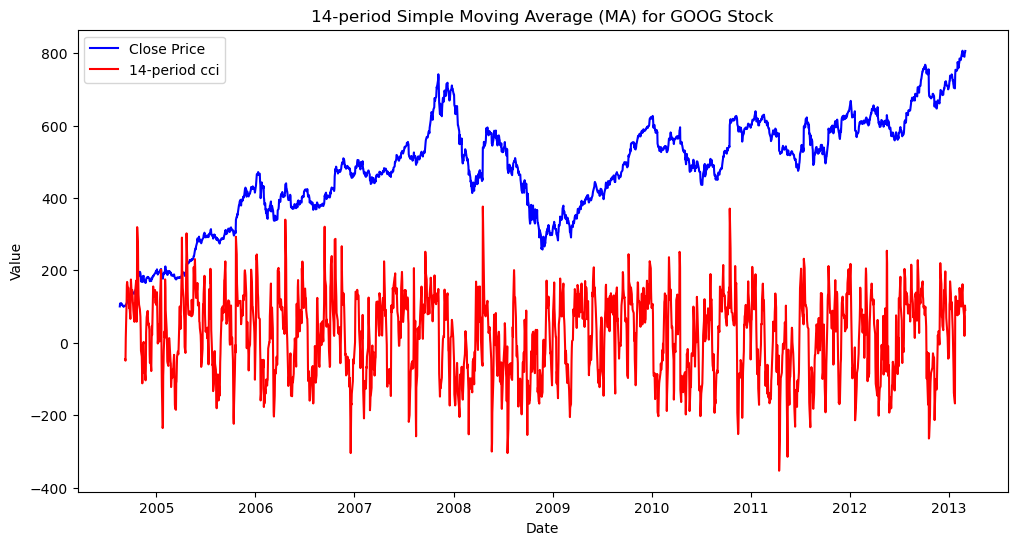

In [2]:
high_prices = GOOG['High']
low_prices = GOOG['Low']
close_prices = GOOG['Close']
timeperiod = 14
# Calculate the Moving Average (MA)
cci = talib.CCI(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Moving Average (MA)
plt.plot(GOOG.index, cci, label=f'{timeperiod}-period cci', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Simple Moving Average (MA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [3]:
class CciStrategy(Strategy):
    cci_timeperiod = 14
    cci_threshold = 100  # CCI threshold for generating signals
    
    def init(self):
        self.cci = self.I(talib.CCI, self.data.High, self.data.Low, self.data.Close, timeperiod=self.cci_timeperiod)
        self.i = self.cci_timeperiod

    def next(self):
        if self.cci[-1] > self.cci_threshold:
            if not self.position:
                self.buy(sl=self.data.Close*0.95, tp=self.data.Close*1.05)
        elif self.cci[-1] < -self.cci_threshold:
            if self.position:
                self.position.close()

    def get_data(self):
        return GOOG.iloc[0:self.i, :]

bt = Backtest(GOOG, CciStrategy, cash=10_000)
stats = bt.run()
bt.plot()
print(stats)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   52.094972
Equity Final [$]                     71247.59
Equity Peak [$]                      72053.04
Return [%]                           612.4759
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   25.905779
Volatility (Ann.) [%]               23.684379
Sharpe Ratio                         1.093792
Sortino Ratio                        2.290178
Calmar Ratio                         1.258998
Max. Drawdown [%]                  -20.576512
Avg. Drawdown [%]                   -3.373454
Max. Drawdown Duration      549 days 00:00:00
Avg. Drawdown Duration       36 days 00:00:00
# Trades                                  138
Win Rate [%]                        60.869565
Best Trade [%]                      12.332234
Worst Trade [%]                      -7.26603
Avg. Trade [%]                    

In [4]:
def optim_func(series):
    if series['# Trades'] < 15 or series['Max. Drawdown [%]'] < -10:
        return -9999
    
    eq_final = series['Equity Final [$]']
    win_rate = series['Win Rate [%]']
    return eq_final *win_rate

bt = Backtest(GOOG, CciStrategy, cash=10_000)
stats = bt.optimize(
    cci_timeperiod = range(2, 18, 7),
    cci_threshold = range(85, 105, 7),
    maximize= optim_func,
    max_tries=100)
bt.plot()
print(stats)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   56.284916
Equity Final [$]                    65147.298
Equity Peak [$]                     65880.348
Return [%]                          551.47298
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   24.590536
Volatility (Ann.) [%]               24.327983
Sharpe Ratio                         1.010792
Sortino Ratio                         2.04307
Calmar Ratio                         0.716993
Max. Drawdown [%]                  -34.296772
Avg. Drawdown [%]                   -3.663812
Max. Drawdown Duration      611 days 00:00:00
Avg. Drawdown Duration       40 days 00:00:00
# Trades                                  173
Win Rate [%]                        56.647399
Best Trade [%]                      12.373936
Worst Trade [%]                     -6.978012
Avg. Trade [%]                    